<a href="https://colab.research.google.com/github/grupos4g4/PROJAPLIC1/blob/main/C%C3%B3pia_Projeto_Aplicado_I_Final_e_Projeto_Futuros(Finalizado).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados para Projetos Futuros

Importação das Bibliotecas a serem utilizadas

In [1]:
# Importação das Bibliotecas a serem Utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


Importação do Dataset

In [3]:
#Vamos fazer a importação do no Dataset
df = pd.read_csv('/content/sample_data/ObesityDataSet.csv')

Apresentação bruta dos nossos dados

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Nesta célula, analisamos as colunas e indentificamos quais variáveis são categóricas e quais são númericas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Classificação dos dados presentes em cada coluna do dataframe

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Valores de Mediana, desvio padrão, valor mínimo, máximo, quartis, retiramos o COUNT, devido se referenciar as linhas com exceção das colunas com variáveis categóricas

In [ ]:
df.describe().drop('count')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Teste para verificação de valores nulos nas colunas

In [ ]:
df.isnull().sum()# passou no teste, não há valores nulos

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

*Por meio de uma análise inicial, os dados estão relacionados à saude de individudos, com uma coluna final, que mostra uma variável categórica representando o nível de obesidade.*

Identificação dos nomes dado a cada categoria de IMC no dataset

In [ ]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

*A funções seguintes irão plotar alguns gráficos para as análises tanto em colunas quanto em pizza em variaveis categoricas, dado escolha ao usuário qual o tipo de gráfico ele gostaria de ter suas análises.*

Função para plotar gráficos em formato de colunas

In [5]:
def analise_coluna_cat(df, coluna):
    plt.figure(figsize=(8, 6))
    ac = (df[coluna].value_counts(normalize = True) * 100 ) .plot(kind = 'bar', color = ['#20b2aa',
        'orange',
        '#b8860b',
        '#bacdff',
        '#ffbaf1',
        'yellow',
        '#fe7272']
    )
    ac.bar_label(ac.containers[0] ,fmt='%.2f%%', label_type = 'edge')
    ac.margins(y = 0.1)
    plt.ylabel('Porcentagem');

Função para plotar gráficos em formato de pizza

In [ ]:
def analise_coluna_cat(df, coluna):
    plt.figure(figsize=(10, 8))
    valores = df[coluna].value_counts(normalize=True)
    cores = ['#20b2aa', 'orange', '#b8860b', '#bacdff', '#ffbaf1', 'yellow', '#fe7272']
    explode = tuple([0.1] + [0.03] * (len(valores) - 1))
    plt.pie(valores, labels=None, autopct=lambda p: '{:.0f}%'.format(p), pctdistance=1.1, labeldistance=1.1, colors=cores, explode=explode)
    plt.title(f'Distribuição de {coluna}')
    plt.legend(valores.index, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.show()

*Os códigos a seguir irão analizar a porcentagem de cada variável categórica*

Análise da porcentagem das variáveis categóricas referentes ao IMC.

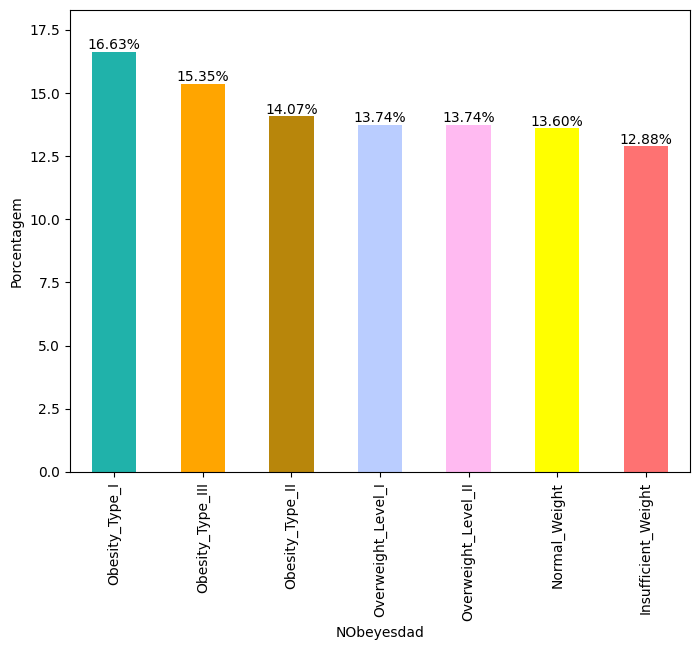

In [ ]:
analise_coluna_cat(df, 'NObeyesdad')

Análise da porcentagem das variáveis categóricas referentes ao Gênero.

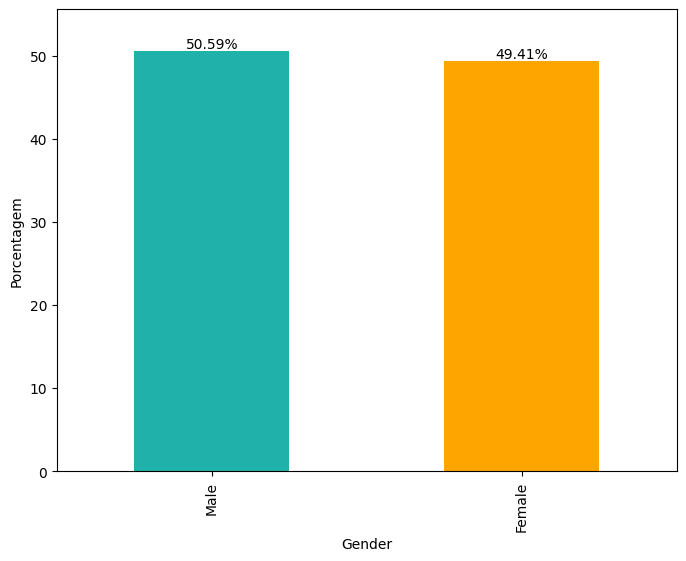

In [ ]:
analise_coluna_cat(df, 'Gender')

Análise da porcentagem das variáveis categóricas referentes ao consumo de bebidas alcoólicas

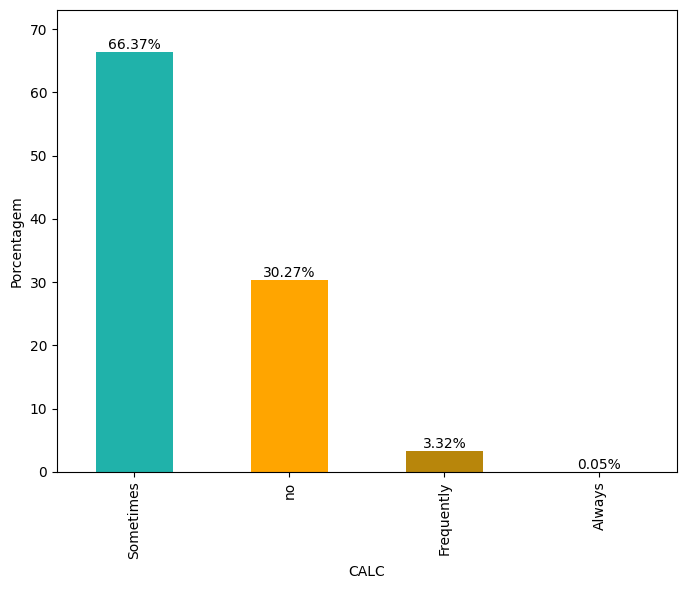

In [ ]:
analise_coluna_cat(df, 'CALC')

Análise da porcentagem das variáveis categóricas referentes ao consumo de alimentos com altos índices calóricos

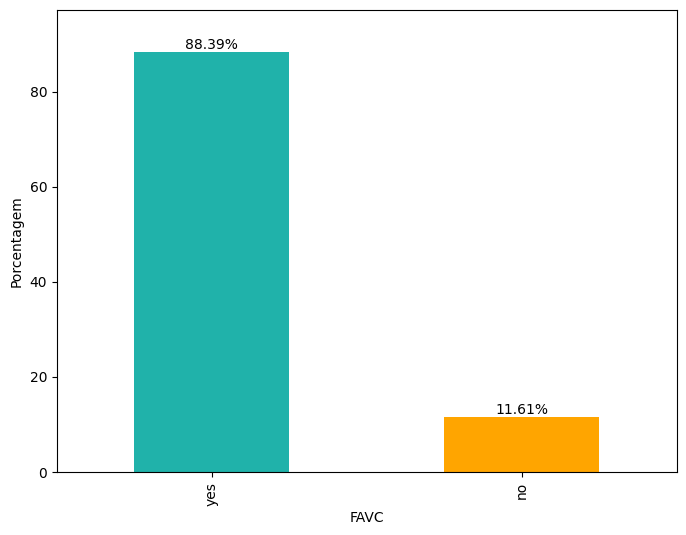

In [ ]:
analise_coluna_cat(df, 'FAVC')

Análise da porcentagem das variáveis categóricas referentes ao histórico familiar de sobrepeso

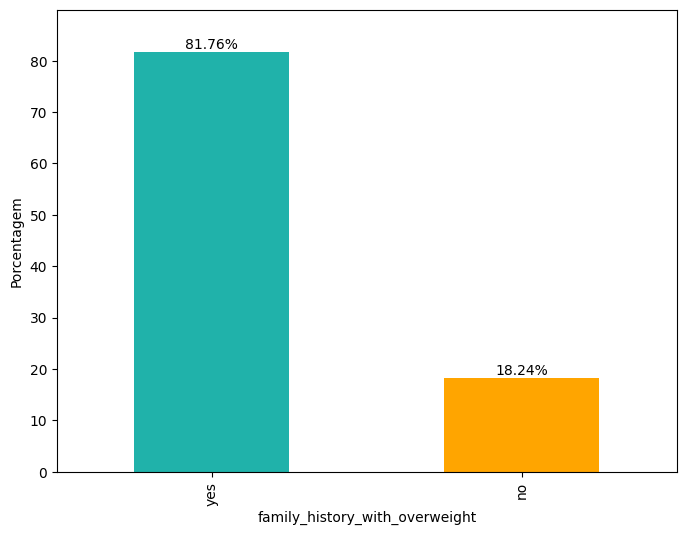

In [ ]:
analise_coluna_cat(df, 'family_history_with_overweight')

Análise da porcentagem das variáveis categóricas referentes ao consumo de alimentos entre as refeições

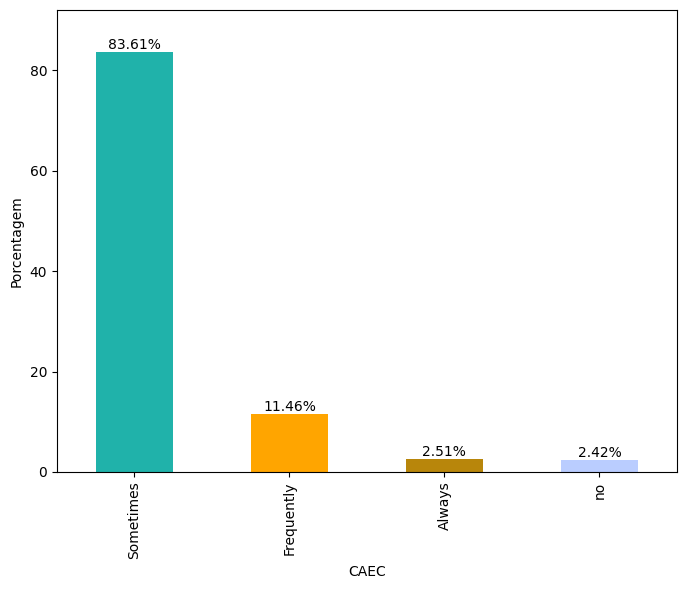

In [ ]:
analise_coluna_cat(df, 'CAEC')

Análise da porcentagem das variáveis categóricas referentes aos fumantes e não-fumantes

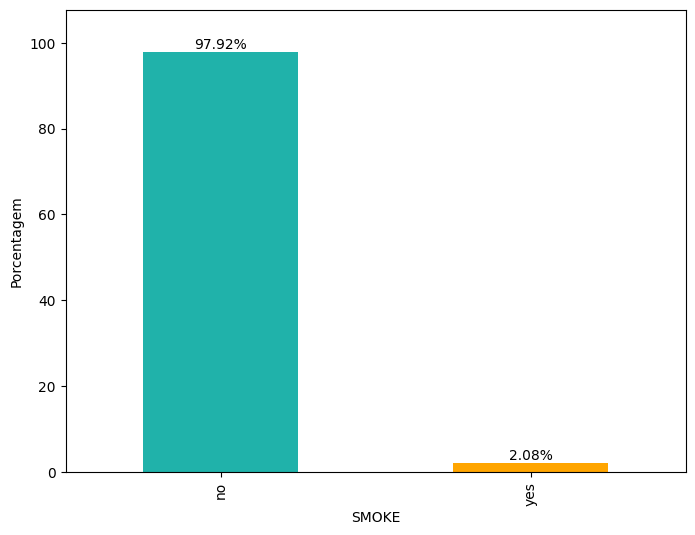

In [ ]:
analise_coluna_cat(df, 'SMOKE')

Análise da porcentagem das variáveis categóricas referentes aos que realizam monitoramento das calorias consumidas durantes as refeições

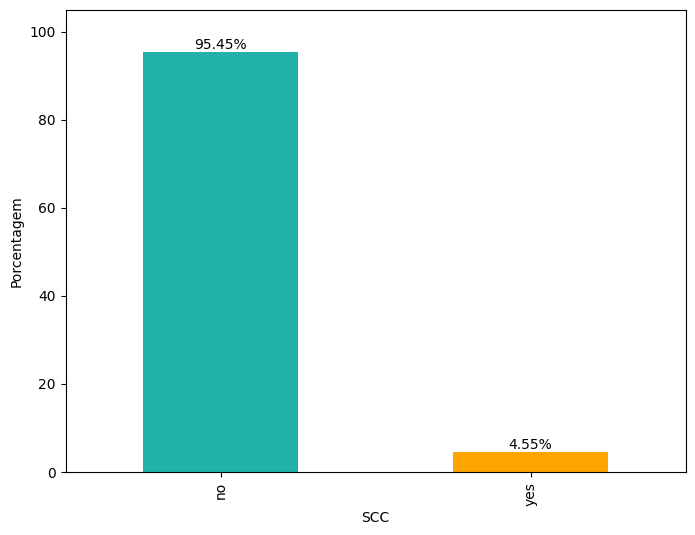

In [ ]:
analise_coluna_cat(df, 'SCC')

Análise da porcentagem das variáveis categóricas referentes aos meios de transporte utilizados para a locomoção

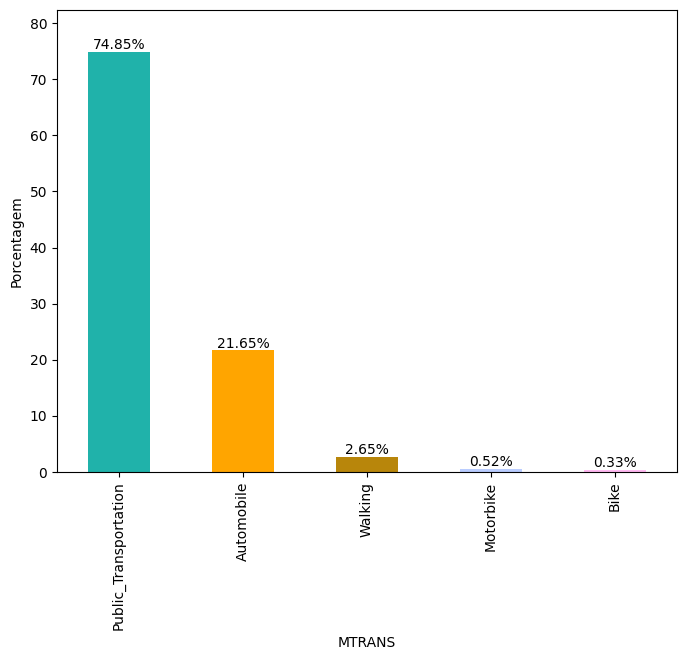

In [ ]:
analise_coluna_cat(df, 'MTRANS')

# Através dos Gráficos em Caixa (BoxPlot), serão analisadas algumas comparações entre algumas colunas, sendo elas categóricas e numéricas, para a determinação aproximada de seus valores interquartis, medianas e a indentificação de outliers.

Análise em Gráficos por BoxPlot da relação entre as colunas


*   Gênero por Idade;
*   Gênero por Altura;
*   Histórico Familiar Sobrepeso por Peso
*   Consumo de alimentos Hipercalóricos por Peso





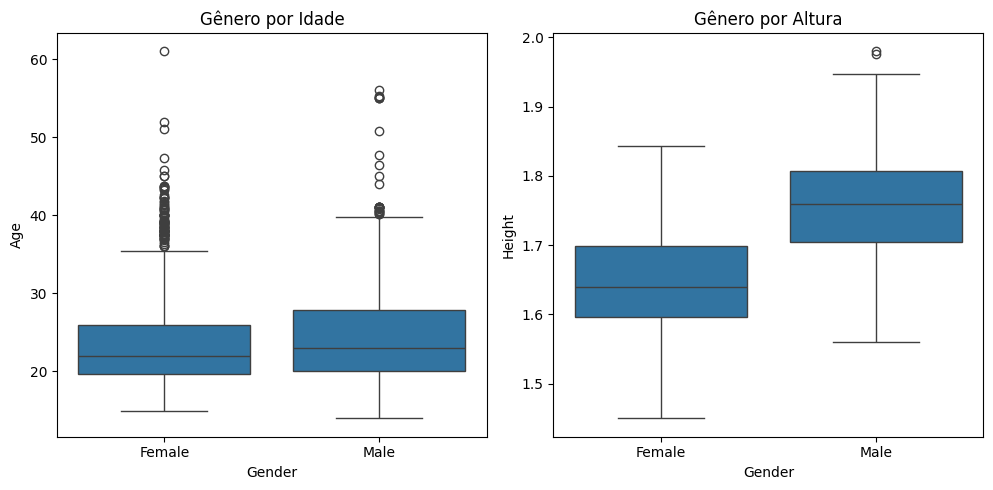

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot( data=df, x='Gender', y= 'Age')
plt.title('Gênero por Idade')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Gender', y='Height')
plt.title('Gênero por Altura')

plt.tight_layout()

# Exibir o gráfico
plt.show()

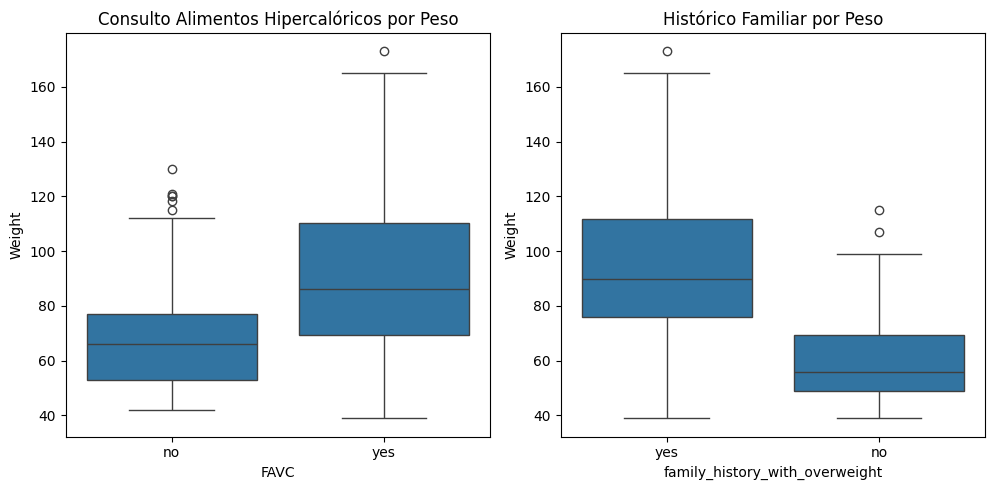

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot( data=df, x='FAVC', y= 'Weight')
plt.title('Consulto Alimentos Hipercalóricos por Peso')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='family_history_with_overweight', y='Weight')
plt.title('Histórico Familiar por Peso')

plt.tight_layout()

# Exibir o gráfico
plt.show()

Identificação Por meio de um Gráfico de Dispersão da concentração de indivíduos em cada grupo da coluna de IMC de acordo com suas idades

<Axes: xlabel='NObeyesdad', ylabel='Age'>

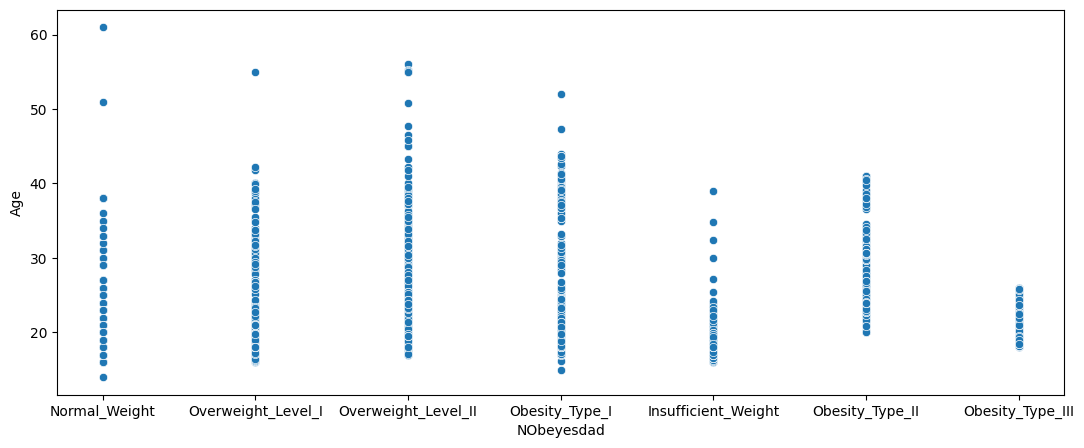

In [ ]:
plt.figure( figsize=(13,5))
sns.scatterplot( data=df, x='NObeyesdad', y= 'Age')

# **OBJETIVOS OBTIDOS POR MEIO DAS ANÁLISES ANTERIORES**

##*   Conversão  dos valores categóricos presentes nas colunas categóricas em em valores numéricos;
##*   Determinar o Nível de acurácia da Análise dos dados;





Converter variáveis categóricas em numéricas

In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['family_history_with_overweight'] = le.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = le.fit_transform(df['FAVC'])

Dividir os dados em conjunto de treinamento e conjunto de teste

In [ ]:
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target variable

Converter variáveis categóricas em variáveis dummy

In [ ]:
X = pd.get_dummies(X, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

Dividir os dados em conjunto de treinamento e conjunto de teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Padronização dos dados

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Inicializar e treinar o modelo de regressão logística com um número maior de iterações

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

Fazer previsões no conjunto de teste

In [ ]:
y_pred = model.predict(X_test_scaled)

Avaliar a precisão do modelo

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de regressão logística:", accuracy)

Acurácia do modelo de regressão logística: 0.8652482269503546


Gráfico de todas as variaveis númericas original

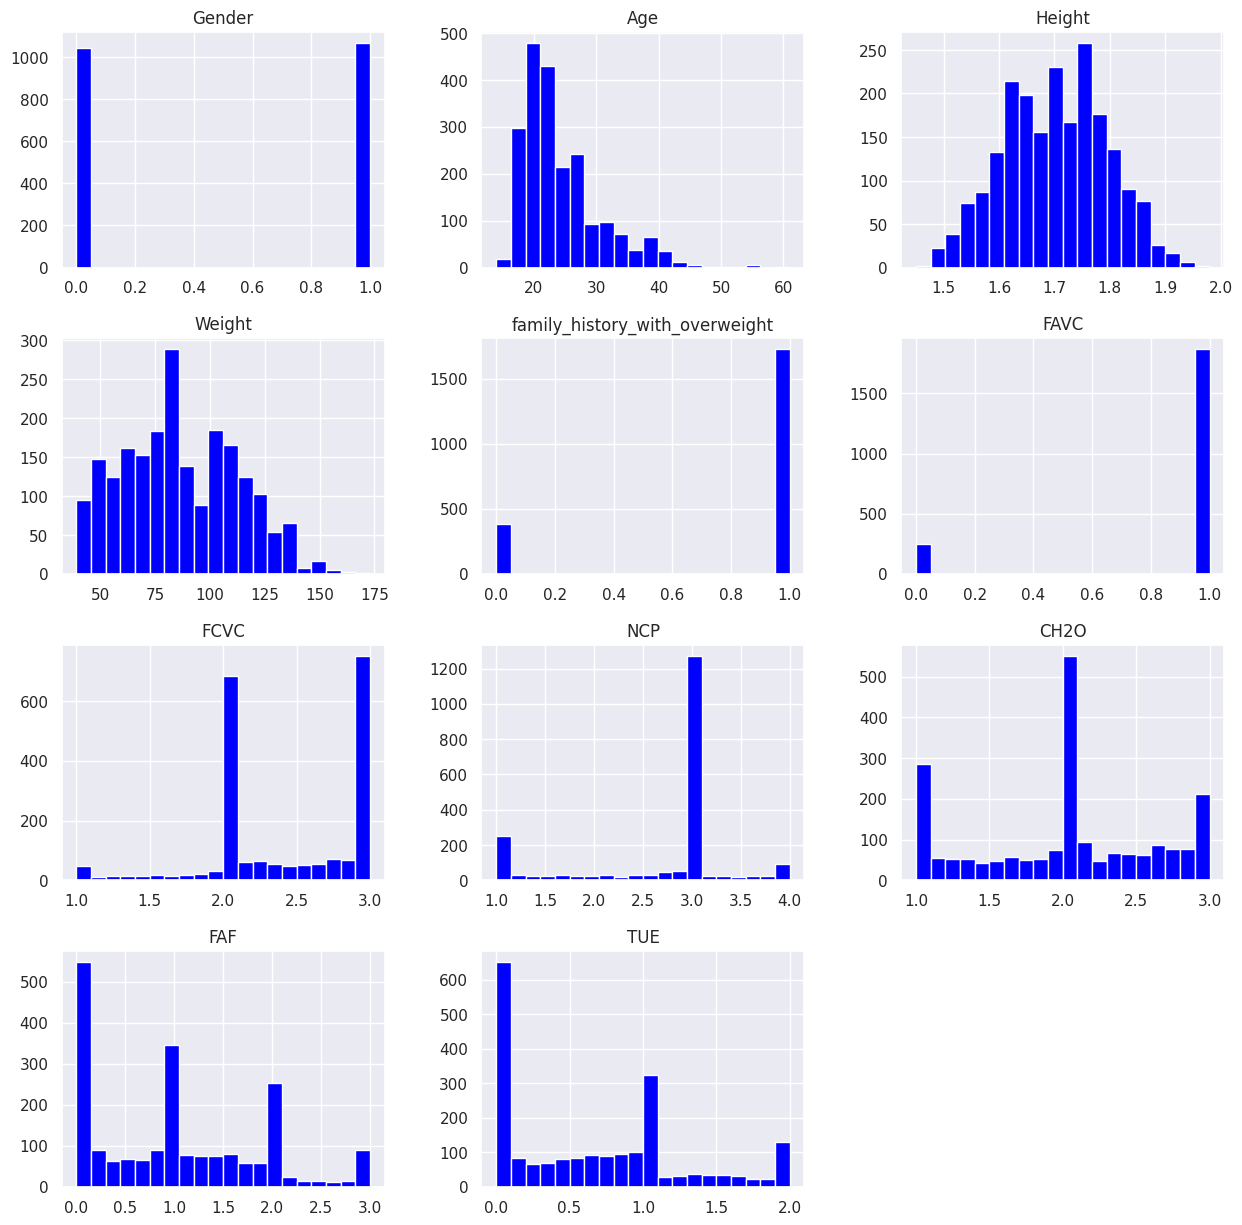

In [ ]:
sns.set( font_scale=1.0, rc={'figure.figsize':(15,15)} )
eixo = df.hist(bins=20, color= 'blue')

Conversão da variável categóricas de IMC em variável numérica. (A quantidade de valores numéricos varia de acordo com a quantidade de valores categóricos presentes em cada coluna)

In [ ]:
df['NObeyesdad_code'] = pd.factorize(df['NObeyesdad'])[0]
df['NObeyesdad_code'].unique()

array([0, 1, 2, 3, 4, 5, 6])

Identificação dos nomes dado a cada categoria convertida de IMC no dataset

In [ ]:
df.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

 As variáveis categoricas presentes em cada colunas e com suas respctivos valores categóricos que estão presentes no dataframe são os seguintes

In [ ]:
df.select_dtypes(include='object').describe().drop('count')

,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
unique,4,2,2,4,5,7
top,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1765,2067,2015,1401,1580,351


#Esta função recebe um DataFrame e o nome de uma coluna categórica.   

Ela cria uma nova coluna no DataFrame com os códigos numéricos correspondentes às categorias da coluna especificada.

In [ ]:
def encode_categorical_variable(df, column_name):
    # Cria uma nova coluna com códigos numéricos para as categorias
    df[column_name + '_code'] = pd.factorize(df[column_name])[0]
    # Retorna os códigos únicos atribuídos
    return df[column_name + '_code'].unique()

# Lista das colunas categóricas que você deseja transformar em numéricas
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC',  'CAEC','SMOKE', 'SCC', 'CALC', 'MTRANS',  'NObeyesdad']

# Loop sobre cada coluna categórica e aplica a função
for column in categorical_columns:
    unique_codes = encode_categorical_variable(df, column)
    print(f"Códigos únicos para a coluna '{column}': {unique_codes}")

Códigos únicos para a coluna 'Gender': [0 1]
Códigos únicos para a coluna 'family_history_with_overweight': [0 1]
Códigos únicos para a coluna 'FAVC': [0 1]
Códigos únicos para a coluna 'CAEC': [0 1 2 3]
Códigos únicos para a coluna 'SMOKE': [0 1]
Códigos únicos para a coluna 'SCC': [0 1]
Códigos únicos para a coluna 'CALC': [0 1 2 3]
Códigos únicos para a coluna 'MTRANS': [0 1 2 3 4]
Códigos únicos para a coluna 'NObeyesdad': [0 1 2 3 4 5 6]


#Modelo de predição a partir dos dados coletados anteriormente do DataFrame

In [ ]:
# Definir as features (X) e a variável alvo (y)
X = df.drop(['NObeyesdad'], axis=1)  # Todas as colunas exceto 'NObeyesdad'
y = df['NObeyesdad']

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Pré-processamento das features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criando o pipeline com pré-processamento e modelo
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

# Treinar o modelo dentro do pipeline nos dados de treinamento
pipeline.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = pipeline.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Acurácia do modelo: 0.98
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      1.00      1.00        86
      Normal_Weight       0.97      1.00      0.98        93
     Obesity_Type_I       1.00      0.99      1.00       102
    Obesity_Type_II       0.99      1.00      0.99        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.95      0.93      0.94        88
Overweight_Level_II       0.95      0.95      0.95        79

           accuracy                           0.98       634
          macro avg       0.98      0.98      0.98       634
       weighted avg       0.98      0.98      0.98       634

